<a href="https://colab.research.google.com/github/Likitha-Thirumalasetty/Prodigy_DS_Task4/blob/main/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

In [ ]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# loading the dataset
training_df=pd.read_csv('/content/twitter_training.csv')
testing_df=pd.read_csv('/content/twitter_validation.csv')

In [ ]:
# obtaining the first few records of the training dataset
training_df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


We notice that there are no columns names in the dataset

In [ ]:
column_names=['id','text','sentiment','message']

In [ ]:
# adding columns to the dataset
training_df=pd.read_csv('/content/twitter_training.csv', names=column_names)
testing_df=pd.read_csv('/content/twitter_validation.csv', names=column_names)

In [ ]:
# checking for the change
training_df.head()

,id,text,sentiment,message
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
# obtaining the statistical measures of the training dataset
training_df.describe()

,id
count,74682.000000
mean,6432.586165
std,3740.427870
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [ ]:
# obtaining the shape of the training dataset
training_df.shape

(74682, 4)

In [ ]:
# obtaining the different data types present in the dataset
training_df.dtypes

id            int64
text         object
sentiment    object
message      object
dtype: object

In [ ]:
# obtaining the first few data points of the testing dataset
testing_df.head()

,id,text,sentiment,message
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


Handling null values and duplicate values

In [ ]:
# searching for null values in training dataset
print(training_df.isnull().sum())

id             0
text           0
sentiment      0
message      686
dtype: int64


In [ ]:
# searching for null values in the testing dataset
print(training_df.isnull().sum())

id             0
text           0
sentiment      0
message      686
dtype: int64


In [ ]:
# dropping the null
training_df.dropna(subset='message', inplace=True)
testing_df.dropna(subset='message', inplace=True)

In [ ]:
training_df.shape

(73996, 4)

In [ ]:
testing_df.shape

(1000, 4)

Converting uppercase to lowercase and removing special characters

In [ ]:
training_df['text'] = training_df['text'].str.lower()
testing_df['text'] = testing_df['text'].str.lower()

In [ ]:
training_df['message'] = training_df['message'].str.lower()
testing_df['message'] = testing_df['message'].str.lower()

In [ ]:
training_df['sentiment'] = training_df['sentiment'].str.lower()
testing_df['sentiment'] = testing_df['sentiment'].str.lower()

In [ ]:
training_df.head()

,id,text,sentiment,message
0,2401,borderlands,positive,im getting on borderlands and i will murder yo...
1,2401,borderlands,positive,i am coming to the borders and i will kill you...
2,2401,borderlands,positive,im getting on borderlands and i will kill you ...
3,2401,borderlands,positive,im coming on borderlands and i will murder you...
4,2401,borderlands,positive,im getting on borderlands 2 and i will murder ...


In [ ]:
# removing special characters
training_df['text'] = training_df['text'].str.replace('[^a-zA-Z\s]', '', regex=True)
testing_df['text'] = testing_df['text'].str.replace('[^a-zA-Z\s]', '', regex=True)

Performing sentiment analysis

In [ ]:
from textblob import TextBlob

# Define a function to get the sentiment polarity
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply the function to the text column
training_df['sentiment_polarity'] = training_df['message'].apply(get_sentiment)
testing_df['sentiment_polarity'] = testing_df['message'].apply(get_sentiment)

# Classify the sentiment as positive, negative, or neutral
def classify_sentiment(polarity):
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

training_df['sentiment_class'] = training_df['sentiment_polarity'].apply(classify_sentiment)
testing_df['sentiment_class'] = testing_df['sentiment_polarity'].apply(classify_sentiment)

Visualizing the sentiment patterns

<ipython-input-59-8f11e33637d5>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_class', data=combined_df, palette='viridis')


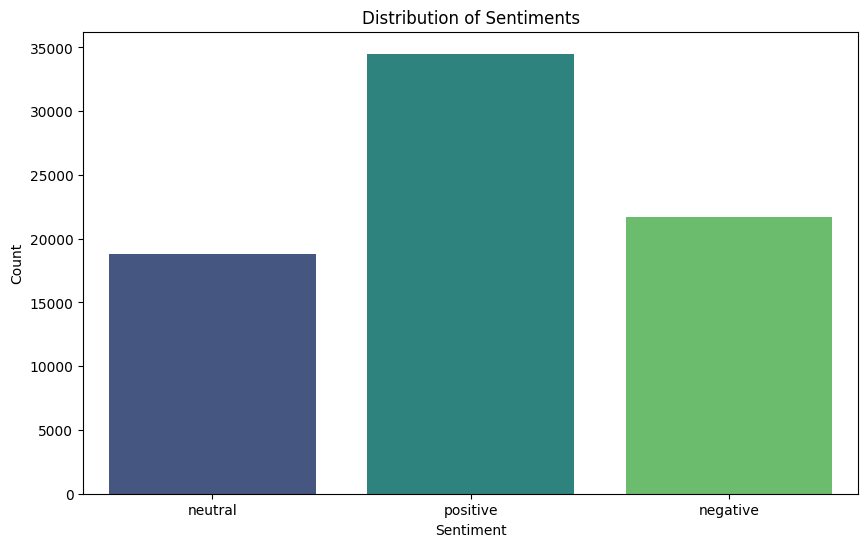

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine train and validation datasets
combined_df = pd.concat([training_df, testing_df])

# Plot the distribution of sentiments
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment_class', data=combined_df, palette='viridis')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()
